In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [106]:
br_cancer = load_breast_cancer() #load the dataset

In [107]:
pdb = pd.DataFrame(br_cancer.data, columns = br_cancer.feature_names)
pdb["target"] = br_cancer.target

In [108]:
pdb.head() #the dataframe of breast cancer dadaframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [109]:
pdb_corr = pdb.corr()['target'] #corellation with target
pdb_corr

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [55]:
dict_of_corr = dict(pdb_corr) #dictionary of the corellation
dict_of_corr_key = list(dict_of_corr.keys())
dict_of_corr_val = list(dict_of_corr.values())


In [110]:
sortedlist_corr = sorted(list(pdb_corr))[::-1][:11]
sortedlist_corr #best corellation value with the target

[1.0,
 0.06701601057948743,
 0.012837602698432402,
 0.008303332973877428,
 0.006521755870647944,
 -0.07797241739025607,
 -0.25372976598083047,
 -0.29299924424885837,
 -0.3238721887208239,
 -0.3304985542625467,
 -0.35855996508593224]

In [111]:
best_corr = {}
for i in sortedlist_corr:
    index_val = dict_of_corr_val.index(i)
    best_corr[dict_of_corr_key[index_val]] = i
best_corr #dictionary containing the target and top 10 features with best corellation

{'target': 1.0,
 'smoothness error': 0.06701601057948743,
 'mean fractal dimension': 0.012837602698432402,
 'texture error': 0.008303332973877428,
 'symmetry error': 0.006521755870647944,
 'fractal dimension error': -0.07797241739025607,
 'concavity error': -0.25372976598083047,
 'compactness error': -0.29299924424885837,
 'worst fractal dimension': -0.3238721887208239,
 'mean symmetry': -0.3304985542625467,
 'mean smoothness': -0.35855996508593224}

In [112]:
best_corr_keys = list(best_corr.keys())
pdb_extract = pdb[best_corr_keys]  #dataframe of the top 10 features with the target
pdb_extract.head()

,target,smoothness error,mean fractal dimension,texture error,symmetry error,fractal dimension error,concavity error,compactness error,worst fractal dimension,mean symmetry,mean smoothness
0,0,0.006399,0.07871,0.9053,0.03003,0.006193,0.05373,0.04904,0.11890,0.2419,0.11840
1,0,0.005225,0.05667,0.7339,0.01389,0.003532,0.01860,0.01308,0.08902,0.1812,0.08474
2,0,0.006150,0.05999,0.7869,0.02250,0.004571,0.03832,0.04006,0.08758,0.2069,0.10960
3,0,0.009110,0.09744,1.1560,0.05963,0.009208,0.05661,0.07458,0.17300,0.2597,0.14250
4,0,0.011490,0.05883,0.7813,0.01756,0.005115,0.05688,0.02461,0.07678,0.1809,0.10030


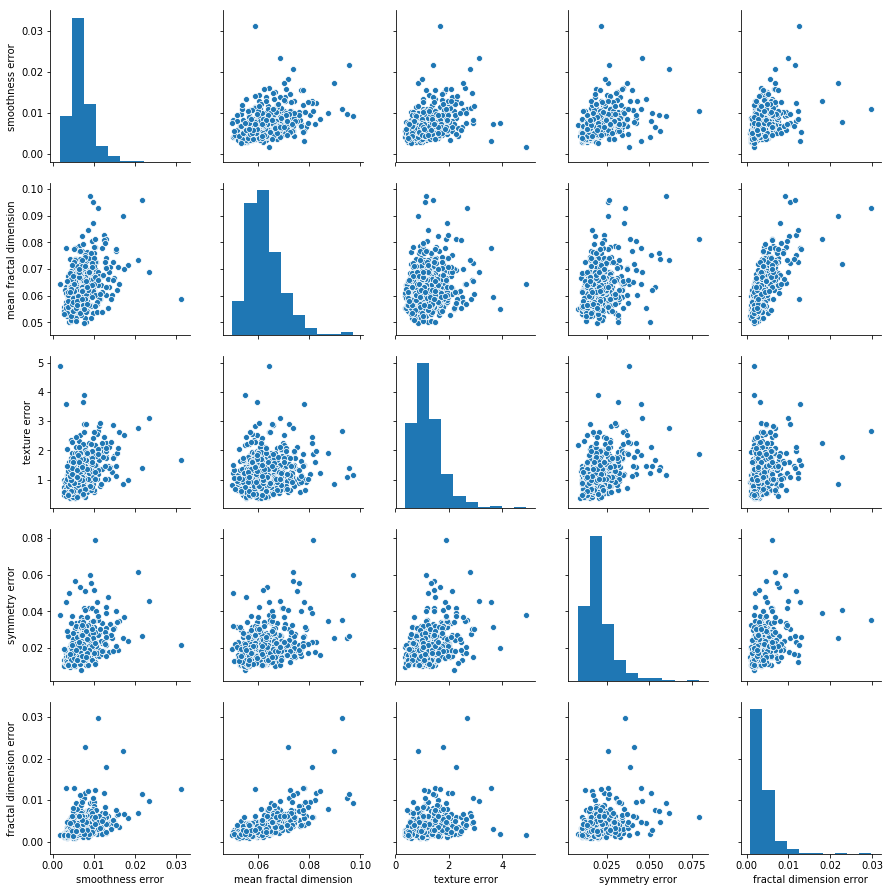

In [113]:
g = sns.pairplot(pdb_extract[best_corr_keys[1:6]]) #pairplot of top 5 features

In [114]:
pdb_extract_copy = pdb_extract.copy() #copy of the dataframe

In [115]:
pdb_extract_copy.head()

,target,smoothness error,mean fractal dimension,texture error,symmetry error,fractal dimension error,concavity error,compactness error,worst fractal dimension,mean symmetry,mean smoothness
0,0,0.006399,0.07871,0.9053,0.03003,0.006193,0.05373,0.04904,0.11890,0.2419,0.11840
1,0,0.005225,0.05667,0.7339,0.01389,0.003532,0.01860,0.01308,0.08902,0.1812,0.08474
2,0,0.006150,0.05999,0.7869,0.02250,0.004571,0.03832,0.04006,0.08758,0.2069,0.10960
3,0,0.009110,0.09744,1.1560,0.05963,0.009208,0.05661,0.07458,0.17300,0.2597,0.14250
4,0,0.011490,0.05883,0.7813,0.01756,0.005115,0.05688,0.02461,0.07678,0.1809,0.10030


In [116]:
column_names = list(pdb_extract_copy) #list of the columns in the dataframe
for i in column_names: #loop throught the column names
    col = pdb_extract_copy[i]
    for j in col.index: #loop through the column index
        col_mean = col.mean() #mean of the column
        if col[j] < col_mean:
            pdb_extract_copy.at[j,i]=None
            

In [117]:
pdb_extract_copy.head(20)

,target,smoothness error,mean fractal dimension,texture error,symmetry error,fractal dimension error,concavity error,compactness error,worst fractal dimension,mean symmetry,mean smoothness
0,NaN,NaN,0.07871,NaN,0.03003,0.006193,0.05373,0.04904,0.11890,0.2419,0.11840
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08902,0.1812,NaN
2,NaN,NaN,NaN,NaN,0.02250,0.004571,0.03832,0.04006,0.08758,0.2069,0.10960
3,NaN,0.009110,0.09744,NaN,0.05963,0.009208,0.05661,0.07458,0.17300,0.2597,0.14250
4,NaN,0.011490,NaN,NaN,NaN,0.005115,0.05688,NaN,NaN,NaN,0.10030
5,NaN,0.007510,0.07613,NaN,0.02165,0.005082,0.03672,0.03345,0.12440,0.2087,0.12780
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.008805,0.07451,1.377,NaN,0.005412,NaN,0.03029,0.11510,0.2196,0.11890
8,NaN,NaN,0.07389,NaN,0.02143,NaN,0.03553,0.03502,0.10720,0.2350,0.12730
9,NaN,0.007149,0.08243,1.599,NaN,0.010080,0.07743,0.07217,0.20750,0.2030,0.11860
